# Sea Level Rise Final Analysis Notebook

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas import DataFrame

import ee
from ee import batch
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

from osgeo import gdal
!pip install elevation
import elevation

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=GvThE-5mk5fr7-_L3XpCsGEElU0WrsaeEkknpCP65no&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/zAG-mxpA26XhDN8UGPp8SGfVTsMRZPhUXcB1S6cAzzPaMGzC6i3meBg

Successfully saved authorization token.
     |████████████████████████████████| 71kB 4.5MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing insta

## SLR Linear Regression Models


#### Global Sea Level Rise

In [0]:
data = pd.read_csv("GMSL.csv")
# Citation of data
# GSFC. 2017. Global Mean Sea Level Trend from Integrated Multi-Mission Ocean Altimeters 
# TOPEX/Poseidon, Jason-1, OSTM/Jason-2 Version 4.2 Ver. 4.2 PO.DAAC, CA, USA.
# Dataset accessed 2020-04-11 at http://dx.doi.org/10.5067/GMSLM-TJ42.

In [0]:
data = data[np.isfinite(data['Year'])]
print(data)
data.shape

     Year  ...  GMSL with GIA and Signals Removed
0    1993  ...                             -37.55
1    1993  ...                             -38.06
2    1993  ...                             -37.60
3    1993  ...                             -37.45
4    1993  ...                             -36.44
..    ...  ...                                ...
987  2020  ...                              57.71
988  2020  ...                              58.13
989  2020  ...                              58.73
990  2020  ...                              59.46
991  2020  ...                              60.28

[992 rows x 4 columns]


(992, 4)

In [0]:
# Printing the First 5 Lines of Data
data.head()

,Year,GMSL Pre-adjustment,GMSL with GIA,GMSL with GIA and Signals Removed
0,1993,-37.02,-37.02,-37.55
1,1993,-38.20,-38.19,-38.06
2,1993,-38.28,-38.27,-37.60
3,1993,-38.56,-38.54,-37.45
4,1993,-37.87,-37.83,-36.44


In [0]:
# Viewing the Data
# Setting the year as the Index
data.set_index('Year')

,GMSL Pre-adjustment,GMSL with GIA,GMSL with GIA and Signals Removed
Year,,,
1993,-37.02,-37.02,-37.55
1993,-38.20,-38.19,-38.06
1993,-38.28,-38.27,-37.60
1993,-38.56,-38.54,-37.45
1993,-37.87,-37.83,-36.44
...,...,...,...
2020,55.72,63.02,57.71
2020,55.67,62.98,58.13
2020,55.61,62.92,58.73


Text(0.5, 1.0, 'Global Mean Sea Levels')

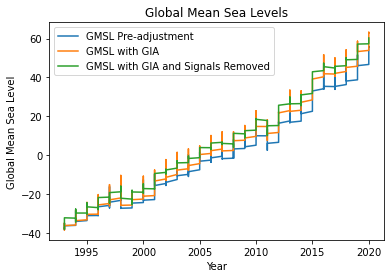

In [0]:
# Plotting the Global Mean Sea Levels
# Global Isostatic Adjustment - GIA
# Signals removed is reffering to annual and semi-annual signals
lines = data.plot.line(x='Year',y=['GMSL Pre-adjustment', 'GMSL with GIA', 'GMSL with GIA and Signals Removed'])
plt.ylabel('Global Mean Sea Level')
plt.title("Global Mean Sea Levels")

In [0]:
# Plotting the Linear Regression
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 3].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

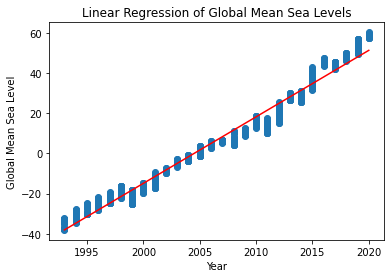

In [0]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.xlabel('Year')
plt.ylabel('Global Mean Sea Level')
plt.title("Linear Regression of Global Mean Sea Levels")
plt.show()

In [0]:
print(linear_regressor.coef_)

[[3.30980398]]


In [0]:
print(linear_regressor.intercept_)

[-6634.52857231]


#### San Francisco, CA

In [0]:
# Data citation
# “Sea Level Trends - NOAA Tides & Currents.” Tides & Currents, 2019, https://tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=9414290.

In [0]:
# Viewing the data
dataSanFran = pd.read_csv("SanFran.csv")
# Removing row if Monthly_MSL is null
dataSanFran = dataSanFran[np.isfinite(dataSanFran[' Monthly_MSL'])]
dataSanFran.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1935,1,-0.105,-0.123,-0.115,-0.13
1,1935,2,-0.152,-0.123,-0.115,-0.13
2,1935,3,-0.122,-0.122,-0.115,-0.13
3,1935,4,-0.062,-0.122,-0.115,-0.13
4,1935,5,-0.094,-0.122,-0.115,-0.13


In [0]:
# Setting the year as the Index
dataSanFran.set_index('Year')

,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
Year,,,,,
1935,1,-0.105,-0.123,-0.115,-0.130
1935,2,-0.152,-0.123,-0.115,-0.130
1935,3,-0.122,-0.122,-0.115,-0.130
1935,4,-0.062,-0.122,-0.115,-0.130
1935,5,-0.094,-0.122,-0.115,-0.130
...,...,...,...,...,...
2019,8,0.050,0.043,0.056,0.031
2019,9,0.067,0.043,0.056,0.031
2019,10,0.025,0.044,0.056,0.031


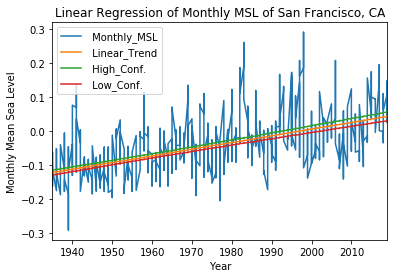

In [0]:
# 0 represents the average global sea level
lines = dataSanFran.plot.line(x='Year',y=[' Monthly_MSL',' Linear_Trend',' High_Conf.',' Low_Conf.'])
plt.title('Linear Regression of Monthly MSL of San Francisco, CA')
plt.xlabel('Year')
plt.ylabel('Monthly Mean Sea Level')
plt.show()

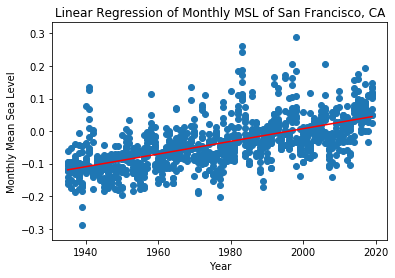

In [0]:
X = dataSanFran.iloc[:, 0].values.reshape(-1, 1)
Y = dataSanFran.iloc[:, 2].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.xlabel('Year')
plt.ylabel('Monthly Mean Sea Level')
plt.title('Linear Regression of Monthly MSL of San Francisco, CA')
plt.show()

In [0]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[[0.00194537]]
[-3.8833819]


### New Orleans, LA

In [0]:
# Data Citation
# “Sea Level Trends - NOAA Tides & Currents.” Tides & Currents, 2019, tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=8761724.

In [0]:
# Viewing the data
dataNewOrl = pd.read_csv("NewOrlUpdated.csv")
# Removing row if Monthly_MSL is null
dataNewOrl = dataNewOrl[np.isfinite(dataNewOrl['Monthly_MSL'])]
dataNewOrl.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1947,1,-0.530,-0.618,-0.601,-0.635
1,1947,2,-0.620,-0.617,-0.600,-0.635
2,1947,3,-0.578,-0.616,-0.599,-0.634
3,1947,4,-0.580,-0.616,-0.598,-0.633
4,1947,5,-0.559,-0.615,-0.598,-0.632


In [0]:
# Setting the year as the Index
dataNewOrl.set_index('Year')

,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
Year,,,,,
1947,1,-0.530,-0.618,-0.601,-0.635
1947,2,-0.620,-0.617,-0.600,-0.635
1947,3,-0.578,-0.616,-0.599,-0.634
1947,4,-0.580,-0.616,-0.598,-0.633
1947,5,-0.559,-0.615,-0.598,-0.632
...,...,...,...,...,...
2019,10,0.212,0.046,0.063,0.029
2019,11,0.083,0.047,0.064,0.030
2019,12,0.047,0.048,0.065,0.030


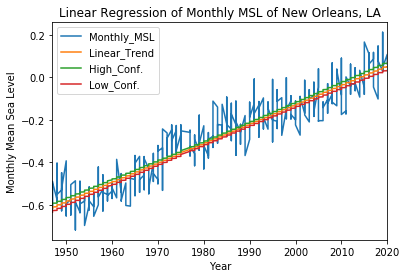

In [0]:
# 0 represents the average global sea level
lines = dataNewOrl.plot.line(x='Year',y=['Monthly_MSL','Linear_Trend','High_Conf.','Low_Conf.'])
plt.title('Linear Regression of Monthly MSL of New Orleans, LA')
plt.xlabel('Year')
plt.ylabel('Monthly Mean Sea Level')
plt.show()

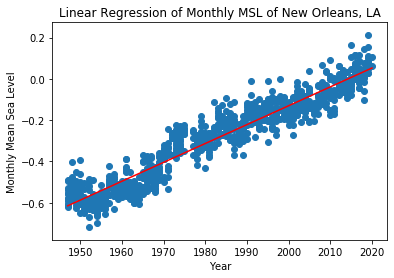

In [0]:
X = dataNewOrl.iloc[:, 0].values.reshape(-1, 1)
Y = dataNewOrl.iloc[:, 2].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.xlabel('Year')
plt.ylabel('Monthly Mean Sea Level')
plt.title('Linear Regression of Monthly MSL of New Orleans, LA')
plt.show()

### Comparing SLR

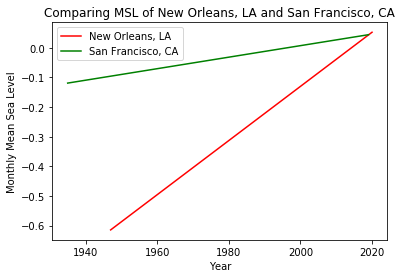

In [0]:
# San Francisco
X_SanFran = dataSanFran.iloc[:, 0].values.reshape(-1, 1)
Y_SanFran = dataSanFran.iloc[:, 2].values.reshape(-1, 1)
linearReg_SanFran = LinearRegression()
linearReg_SanFran.fit(X_SanFran, Y_SanFran)
Y_predSanFran = linearReg_SanFran.predict(X_SanFran)

# New Orleans
X_NewOrl = dataNewOrl.iloc[:, 0].values.reshape(-1, 1)
Y_NewOrl = dataNewOrl.iloc[:, 2].values.reshape(-1, 1)
linearReg_NewOrl = LinearRegression()
linearReg_NewOrl.fit(X_NewOrl, Y_NewOrl)
Y_predNewOrl = linearReg_NewOrl.predict(X_NewOrl)

plt.plot(X_NewOrl, Y_predNewOrl, color = 'red', label = 'New Orleans, LA')
plt.plot(X_SanFran, Y_predSanFran, color = 'green', label ='San Francisco, CA')
plt.xlabel('Year')
plt.ylabel('Monthly Mean Sea Level')
plt.title('Comparing MSL of New Orleans, LA and San Francisco, CA')
plt.legend()
plt.show()

## Timelapse of Coastlines

In [0]:
# Code adapted from http://www.acgeospatial.co.uk/building-time-lapse-imagery-gee/
# Citation Below
# Cutts, Andrew. “Acgeospatial.” Building Time-Lapse Imagery with Google Earth Engine, 31 Oct. 2017, www.acgeospatial.co.uk/building-time-lapse-imagery-gee/.

### San Francisco, CA

In [0]:
# Define the collection - Using Landsat 8 Tier 1 Top of Atmosphere
collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')

# Selecting point of interest based on latitude, longitude
  # 37.7749° N, 122.4194 for San Francisco
pointUAE = ee.Geometry.Point(-122.1899, 37.5010)
pathrow = collection.filterBounds(pointUAE)
 
# Filter cloudy scenes
clouds = pathrow.filter(ee.Filter.lt('CLOUD_COVER', 5))

# Select the bands to show true color
bands = clouds.select(['B4', 'B3', 'B2'])

In [0]:
# Make the data 8-bit.
def convertBit(image):
    return image.multiply(512).uint8()  

# Conversion
outputVideo = bands.map(convertBit)

print("Check: Video is being built")

# Export to video

# San Francisco
  # Specific latitude longitude in region
  # Decided 2 frames per second, 1 too slow
out = batch.Export.video.toDrive(outputVideo, description='sanFran', dimensions = 720, framesPerSecond = 2, region=([-122.8784179,37.978845], [-121.8749998,37.9759583], [-121.8566893,37.3788879], [-122.8656001,37.3861623], [-122.8674315,37.9759583]), maxFrames=10000)

# Process the image
process = batch.Task.start(out)

# Video is now in cloud
print("Check: Video is in cloud")

Check: Video is being built
Check: Video is in cloud


### New Orleans, LA

In [0]:
# Define the collection - Using Landsat 8 Tier 1 Top of Atmosphere
collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')

# Selecting point of interest based on latitude, longitude
  # 29.9511° N, -90.0715° with New Orleans
pointUAE = ee.Geometry.Point(-90.0715, 29.9511)
pathrow = collection.filterBounds(pointUAE)
 
# Filter cloudy scenes
clouds = pathrow.filter(ee.Filter.lt('CLOUD_COVER', 5))

# Select the bands to show false color
  # true color did not show up as well (too dark)
bands = clouds.select(['B8', 'B4', 'B3'])

In [0]:
# Make the data 8-bit
def convertBit(image):
    return image.multiply(512).uint8()  

# Conversion    
outputVideo = bands.map(convertBit)

print("Check: Video is being built")

# Export to video

# New Orleans
  # Specific latitude longitude in region
  # Decided 2 frames per second, 1 too slow
out = batch.Export.video.toDrive(outputVideo, description='NOLA', dimensions = 720, framesPerSecond = 2, region=( [-91.047359, 30.3981459],[-90.9814458,29.2352817],[-89.2163095,29.2480632],[-89.2089844,30.3728752],[-91.047359,30.3981459]), maxFrames=10000)

# Process the image
process = batch.Task.start(out)
# Video is now in cloud
print("Check: Video is in cloud")

Check: Video is being built
Check: Video is in cloud


## Elevation Models

In [0]:
# Code adapted from https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/.
# Citation Below
# Oakley, Matt, and Max Joseph. “Visualizing Elevation Contours from Raster Digital Elevation Models in Python.” Earth Data Science, Earth Lab, 3 Sept. 2019, 
#    www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/.

# TIFF Images Citation
# “EarthExplorer.” USGS, USGS, http://earthexplorer.usgs.gov/. 
# Photos used were n29_w091_1arc_v3 and n37_w123_1arc_v3 SRTM TIFFs (Tagged Image File Format), software courtesy of the U.S. Geological Survey.


### San Francisco, CA

In [0]:
# Fetch and Read DEM Data
# Selected SRTM image based off coordinates from the USGS Earth Explorer
  # Approximate latitude longitute bounds of the region - San Francisco, CA
!eio clip -o SanFranciscoUSGS.tif --bounds -122.96 37.42 -121.69 38.09

make: Entering directory '/root/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.c16d0c748b224fed9c2a5798c2c01d6e.vrt
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -122.96 38.09 -121.69 37.42 SRTM1.c16d0c748b224fed9c2a5798c2c01d6e.vrt /content/SanFranciscoUSGS.tif
rm -f SRTM1.c16d0c748b224fed9c2a5798c2c01d6e.vrt
make: Leaving directory '/root/.cache/elevation/SRTM1'


In [0]:
# Read in as 2D array and remove any NaN entries to clean data
filename = "SanFranciscoUSGS.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

In [0]:
# convert to a Numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

array([[  25.,   25.,   25., ...,   -5.,   -4.,   -4.],
       [  26.,   26.,   25., ...,   -4.,   -4.,   -4.],
       [  26.,   26.,   26., ...,   -3.,   -3.,   -3.],
       ...,
       [-399., -402., -404., ...,  986.,  975.,  969.],
       [-399., -402., -405., ...,  990.,  981.,  972.],
       [-401., -404., -406., ...,  996.,  987.,  978.]])

In [0]:
# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

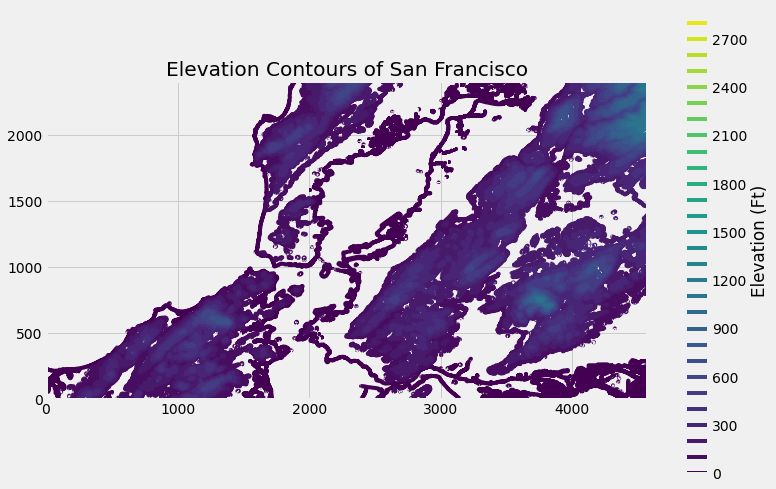

In [0]:
# Visualize Data with MatplotLib
# Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
# Tried to do range of 5000, was too large so narrowed down to 3000
plt.contour(data_array, cmap = "viridis",
            levels = list(range(0, 3000, 100)))
plt.title("Elevation Contours of San Francisco")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
cbar.ax.set_ylabel('Elevation (Ft)')
plt.show()

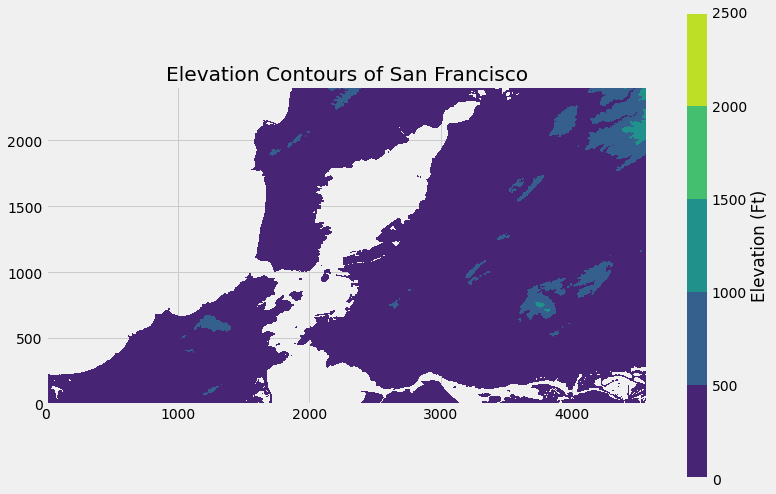

In [0]:
# Instead of using Matplotlib's 'countor' like previous image, using 'contourf' to see filled countours

# Change levels to scale more to 0
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
# Tried to do range of 5000, was too large so narrowed down to 3000
plt.contourf(data_array, cmap = "viridis",
            levels = list(range(0, 3000, 500)))
plt.title("Elevation Contours of San Francisco")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
cbar.ax.set_ylabel('Elevation (Ft)')
plt.show()

### New Orleans, LA

In [0]:
# Fetch and Read DEM Data
# Selected SRTM image based off coordinates from the USGS Earth Explorer
  # Approximate latitude longitute bounds of the region - New Orleans, LA
!eio clip -o NOLA_USGS.tif --bounds -90.74 29.02 -88.69 30.36

make: Entering directory '/root/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.59c4b5479f7f46e79f5629796fbce0d0.vrt
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -90.74 30.36 -88.69 29.02 SRTM1.59c4b5479f7f46e79f5629796fbce0d0.vrt /content/NOLA_USGS.tif
rm -f SRTM1.59c4b5479f7f46e79f5629796fbce0d0.vrt
make: Leaving directory '/root/.cache/elevation/SRTM1'


In [0]:
# Read in as 2D array and remove any NaN entries to clean data
filename = "NOLA_USGS.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

In [0]:
# convert to a Numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

array([[   7.,    7.,    7., ...,    0.,    1.,    0.],
       [   7.,    7.,    7., ...,    1.,    1.,    1.],
       [   7.,    7.,    7., ...,    1.,    1.,    0.],
       ...,
       [  -5.,   -5.,   -5., ..., -271., -272., -272.],
       [  -5.,   -5.,   -5., ..., -272., -272., -272.],
       [  -5.,   -5.,   -5., ..., -272., -272., -273.]])

In [0]:
# Replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

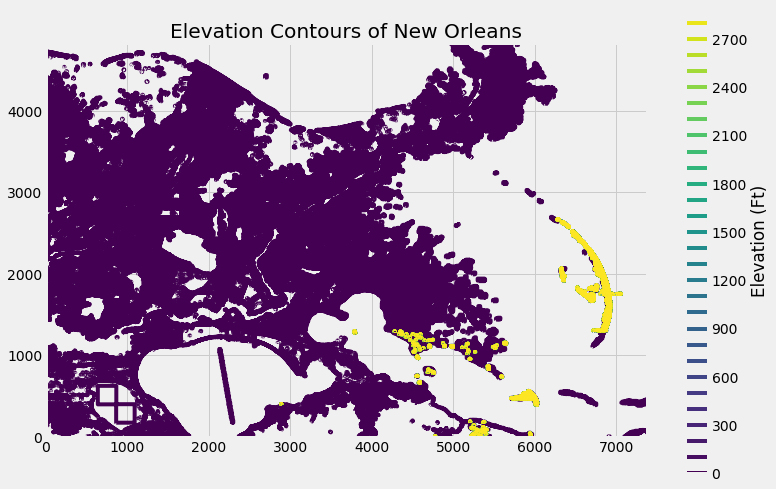

In [0]:
# Visualize Data with MatplotLib
# Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
# Tried to do range of 5000, was too large so narrowed down to 3000
plt.contour(data_array, cmap = "viridis",
            levels = list(range(0, 3000, 100)))
plt.title("Elevation Contours of New Orleans")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
cbar.ax.set_ylabel('Elevation (Ft)')
plt.show()

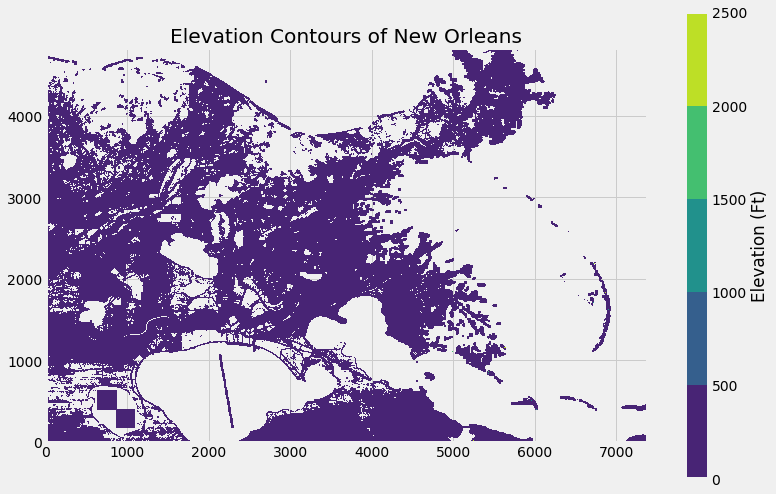

In [0]:
# Instead of using Matplotlib's 'countor' like previous image, using 'contourf' to see filled countours

# Change levels to scale more to 0
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
# Tried to do range of 5000, was too large so narrowed down to 3000
plt.contourf(data_array, cmap = "viridis",
            levels = list(range(0, 3000, 500)))
plt.title("Elevation Contours of New Orleans")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
cbar.ax.set_ylabel('Elevation (Ft)')
plt.show()

## Ice Melt

In [0]:
# Data Citation
# Wiese, D. N., D.-N. Yuan, C. Boening, F. W. Landerer, and M. M. Watkins (2019) JPL GRACE and GRACE-FO Mascon Ocean, Ice, and Hydrology Equivalent.
#    HDR Water Height RL06M CRI Filtered Version 2.0, Ver. 2.0, PO.DAAC, CA, USA. Dataset accessed [2020-04-01] at http://dx.doi.org/10.5067/TEMSC-3MJ62.

### Antartica

In [0]:
# Viewing the data
antarcticaData = pd.read_csv("antarcticaIceMelt.csv")
antarcticaData.head()

,Time,Antarctic mass (Gigatonnes),Antarctic mass 1-sigma uncertainty (Gigatonnes)
0,2002.29,0.00,178.90
1,2002.35,18.73,102.47
2,2002.62,-59.58,83.09
3,2002.71,46.11,97.19
4,2002.79,63.26,61.82


In [0]:
# Checking for Nulls
print(antarcticaData['Antarctic mass (Gigatonnes)'].isna().sum())
print(antarcticaData['Antarctic mass 1-sigma uncertainty (Gigatonnes)'].isna().sum())
print(antarcticaData['Time'].isna().sum())

0
0
0


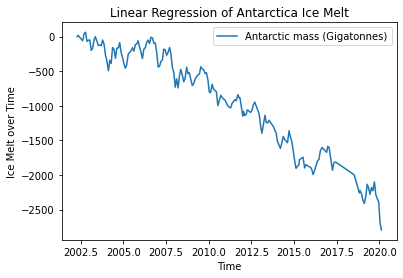

In [0]:
# 0 represents the average global sea level
lines = antarcticaData.plot.line(x='Time',y=['Antarctic mass (Gigatonnes)'])
plt.title('Linear Regression of Antarctica Ice Melt')
plt.xlabel('Time')
plt.ylabel('Ice Melt over Time')
plt.show()

### Greenland

In [0]:
# Viewing the data
greenlandData = pd.read_csv("greenlandIceMelt.csv")
greenlandData.head()

,Time,Greenland mass (Gigatonnes),Greenland mass 1-sigma uncertainty (Gigatonnes)
0,2002.29,0.00,134.28
1,2002.35,70.86,70.59
2,2002.62,-218.88,53.36
3,2002.71,-241.32,64.95
4,2002.79,-206.91,39.05


In [0]:
# Checking for Nulls
print(greenlandData['Greenland mass (Gigatonnes)'].isna().sum())
print(greenlandData['Greenland mass 1-sigma uncertainty (Gigatonnes)'].isna().sum())
print(greenlandData['Time'].isna().sum())

0
0
0


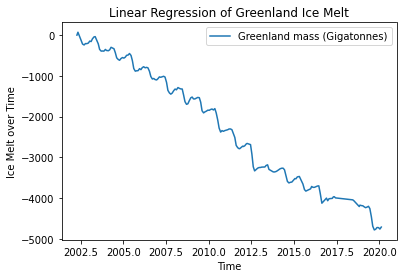

In [0]:
# 0 represents the average global sea level
lines = greenlandData.plot.line(x='Time',y=['Greenland mass (Gigatonnes)'])
plt.title('Linear Regression of Greenland Ice Melt')
plt.xlabel('Time')
plt.ylabel('Ice Melt over Time')
plt.show()

### Comparison of Antartica and Greenland

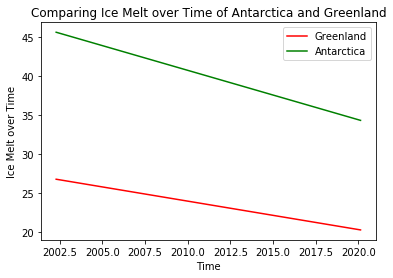

In [0]:
# Antarctica
X_Antar = antarcticaData.iloc[:, 0].values.reshape(-1, 1)
Y_Antar = antarcticaData.iloc[:, 2].values.reshape(-1, 1)
linearReg_Antar = LinearRegression()
linearReg_Antar.fit(X_Antar, Y_Antar)
Y_predAntar = linearReg_Antar.predict(X_Antar)

# Greenland
X_green = greenlandData.iloc[:, 0].values.reshape(-1, 1)
Y_green = greenlandData.iloc[:, 2].values.reshape(-1, 1)
linearReg_green = LinearRegression()
linearReg_green.fit(X_green, Y_green)
Y_predGreen = linearReg_green.predict(X_green)

plt.plot(X_green, Y_predGreen, color = 'red', label = 'Greenland')
plt.plot(X_Antar, Y_predAntar, color = 'green', label ='Antarctica')
plt.xlabel('Time')
plt.ylabel('Ice Melt over Time')
plt.title('Comparing Ice Melt over Time of Antarctica and Greenland')
plt.legend()
plt.show()

## Ocean Surface Temperature


In [0]:
data = pd.read_csv("AvgOceanSurfaceTempIncrease.csv")

In [0]:
data = data[np.isfinite(data['Year'])]
print(data)
data.shape

    Year  Degrees (F)
0   2000         0.79
1   2001         0.97
2   2002         1.04
3   2003         1.10
4   2004         1.04
5   2005         1.06
6   2006         1.02
7   2007         0.89
8   2008         0.85
9   2009         1.05
10  2010         1.06
11  2011         0.89
12  2012         0.98
13  2013         1.03
14  2014         1.18


(15, 2)

In [0]:
# Printing the First 5 Lines of Data
data.head()

,Year,Degrees (F)
0,2000,0.79
1,2001,0.97
2,2002,1.04
3,2003,1.10
4,2004,1.04


In [0]:
# Viewing the Data
# Setting the year as the Index
data.set_index('Year')

,Degrees (F)
Year,
2000,0.79
2001,0.97
2002,1.04
2003,1.10
2004,1.04
2005,1.06
2006,1.02
2007,0.89
2008,0.85


Text(0, 0.5, 'Degrees (F)')

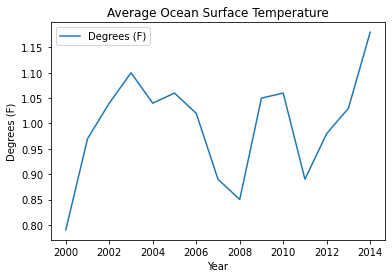

In [0]:
# Plotting the average ocean temperature increase from 2000 to 2014
lines = data.plot.line(x='Year',y=['Degrees (F)'])
plt.xlabel('Year')
plt.title('Average Ocean Surface Temperature')
plt.ylabel('Degrees (F)')

In [0]:
# Plotting the Linear Regression
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

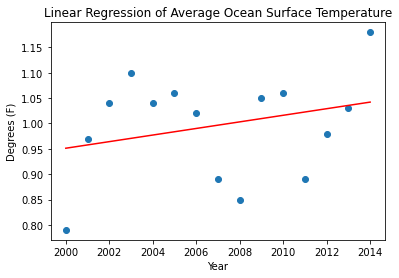

In [0]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.xlabel('Year')
plt.title('Linear Regression of Average Ocean Surface Temperature')
plt.ylabel('Degrees (F)')
plt.show()

In [0]:
print(linear_regressor.coef_)

[[0.0065]]


In [0]:
print(linear_regressor.intercept_)

[-12.04883333]


## Random Forest Prediction

In [0]:
# Code adapted from 
# Koehrsen, Will. “Random Forest in Python.” Medium, Towards Data Science, 27 Dec. 2017, http://towardsdatascience.com/random-forest-in-python-24d0893d51c0.

### New Orleans, LA

In [0]:
# Read in data 
data = pd.read_csv('RFData.csv')
# Data compiled from previous sources
data.dropna()
data.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.,Sea Surface Temp,Greenland mass (Gigatonnes),Antarctic mass (Gigatonnes),GMSL,Monthly_MSL_SF,Linear_Trend_SF,High_Conf._SF,Low_Conf_SF
0,2002,1,-0.169,-0.116,-0.104,-0.127,1.04,0.00,0.00,-8.505,-0.059,0.009,0.019,-0.001
1,2002,2,-0.154,-0.115,-0.104,-0.127,1.04,70.86,18.73,-8.505,-0.084,0.009,0.019,-0.001
2,2002,3,-0.119,-0.114,-0.103,-0.126,1.04,70.86,18.73,-8.505,-0.053,0.009,0.019,-0.001
3,2002,4,-0.104,-0.114,-0.102,-0.125,1.04,-218.88,-59.58,-8.505,-0.039,0.009,0.019,-0.001
4,2002,5,-0.108,-0.113,-0.101,-0.125,1.04,-218.88,-59.58,-8.505,-0.062,0.009,0.020,-0.001


In [0]:
# Removing row if Monthly_MSL is null
data = data[np.isfinite(data['Year'])]
data = data[np.isfinite(data['Month'])]
data = data[np.isfinite(data['Monthly_MSL'])]
data = data[np.isfinite(data['Linear_Trend'])]
data = data[np.isfinite(data['High_Conf.'])]
data = data[np.isfinite(data['Low_Conf.'])]
data = data[np.isfinite(data['Sea Surface Temp'])]
data = data[np.isfinite(data['Greenland mass (Gigatonnes)'])]
data = data[np.isfinite(data['Antarctic mass (Gigatonnes)'])]
data = data[np.isfinite(data['GMSL'])]
data = data[np.isfinite(data['Monthly_MSL_SF'])]
data = data[np.isfinite(data['Linear_Trend_SF'])]
data = data[np.isfinite(data['High_Conf._SF'])]
data = data[np.isfinite(data['Low_Conf_SF'])]
data.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.,Sea Surface Temp,Greenland mass (Gigatonnes),Antarctic mass (Gigatonnes),GMSL,Monthly_MSL_SF,Linear_Trend_SF,High_Conf._SF,Low_Conf_SF
0,2002,1,-0.169,-0.116,-0.104,-0.127,1.04,0.00,0.00,-8.505,-0.059,0.009,0.019,-0.001
1,2002,2,-0.154,-0.115,-0.104,-0.127,1.04,70.86,18.73,-8.505,-0.084,0.009,0.019,-0.001
2,2002,3,-0.119,-0.114,-0.103,-0.126,1.04,70.86,18.73,-8.505,-0.053,0.009,0.019,-0.001
3,2002,4,-0.104,-0.114,-0.102,-0.125,1.04,-218.88,-59.58,-8.505,-0.039,0.009,0.019,-0.001
4,2002,5,-0.108,-0.113,-0.101,-0.125,1.04,-218.88,-59.58,-8.505,-0.062,0.009,0.020,-0.001


In [0]:
data.columns.values

array(['Year', 'Month', 'Monthly_MSL', 'Linear_Trend', 'High_Conf.',
       'Low_Conf.', 'Sea Surface Temp', 'Greenland mass (Gigatonnes)',
       'Antarctic mass (Gigatonnes)', 'GMSL', 'Monthly_MSL_SF',
       'Linear_Trend_SF', 'High_Conf._SF', 'Low_Conf_SF'], dtype=object)

In [0]:
newOrlData = data.drop(['Monthly_MSL_SF','Linear_Trend_SF','High_Conf._SF','Low_Conf_SF'], axis=1)

In [0]:
print('The shape of our features is:', newOrlData.shape)
print(newOrlData.columns.values)

The shape of our features is: (216, 10)
['Year' 'Month' 'Monthly_MSL' 'Linear_Trend' 'High_Conf.' 'Low_Conf.'
 'Sea Surface Temp' 'Greenland mass (Gigatonnes)'
 'Antarctic mass (Gigatonnes)' 'GMSL']


In [0]:
# Descriptive statistics for each column to identify anomalies
newOrlData.describe()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.,Sea Surface Temp,Greenland mass (Gigatonnes),Antarctic mass (Gigatonnes),GMSL
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2010.574074,6.435185,-0.044880,-0.033569,-0.019319,-0.047829,1.009784,-2292.529398,-998.235324,19.457898
std,5.277779,3.487581,0.083532,0.048176,0.049863,0.046482,0.075440,1458.169887,760.809236,19.474155
min,2002.000000,1.000000,-0.210000,-0.116000,-0.104000,-0.127000,0.850000,-4778.560000,-2794.760000,-8.505000
25%,2006.000000,3.000000,-0.108250,-0.075250,-0.062250,-0.088000,0.996667,-3664.327500,-1752.115000,4.002000
50%,2010.500000,6.000000,-0.053000,-0.034500,-0.020000,-0.048500,1.008333,-2320.330000,-893.455000,14.314500
75%,2015.000000,9.250000,0.012250,0.008250,0.024250,-0.007750,1.050000,-887.382500,-264.847500,35.697000
max,2020.000000,12.000000,0.212000,0.049000,0.066000,0.032000,1.180000,70.860000,63.260000,58.375000


In [0]:
# We don't need to one hot encode since all numerical data
newOrlData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 217
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         216 non-null    float64
 1   Month                        216 non-null    float64
 2   Monthly_MSL                  216 non-null    float64
 3   Linear_Trend                 216 non-null    float64
 4   High_Conf.                   216 non-null    float64
 5   Low_Conf.                    216 non-null    float64
 6   Sea Surface Temp             216 non-null    float64
 7   Greenland mass (Gigatonnes)  216 non-null    float64
 8   Antarctic mass (Gigatonnes)  216 non-null    float64
 9   GMSL                         216 non-null    float64
dtypes: float64(10)
memory usage: 18.6 KB


In [0]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(newOrlData)
# Display the first 5 rows of the last 12 columns
features.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.,Sea Surface Temp,Greenland mass (Gigatonnes),Antarctic mass (Gigatonnes),GMSL
0,2002.0,1.0,-0.169,-0.116,-0.104,-0.127,1.04,0.00,0.00,-8.505
1,2002.0,2.0,-0.154,-0.115,-0.104,-0.127,1.04,70.86,18.73,-8.505
2,2002.0,3.0,-0.119,-0.114,-0.103,-0.126,1.04,70.86,18.73,-8.505
3,2002.0,4.0,-0.104,-0.114,-0.102,-0.125,1.04,-218.88,-59.58,-8.505
4,2002.0,5.0,-0.108,-0.113,-0.101,-0.125,1.04,-218.88,-59.58,-8.505


In [0]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Monthly_MSL'])

# Remove the labels from the features
# axis 1 refers to the columns

features= features.drop(['Monthly_MSL','High_Conf.','Low_Conf.'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
print(features)

[[ 2.00200e+03  1.00000e+00 -1.16000e-01 ...  0.00000e+00  0.00000e+00
  -8.50500e+00]
 [ 2.00200e+03  2.00000e+00 -1.15000e-01 ...  7.08600e+01  1.87300e+01
  -8.50500e+00]
 [ 2.00200e+03  3.00000e+00 -1.14000e-01 ...  7.08600e+01  1.87300e+01
  -8.50500e+00]
 ...
 [ 2.01900e+03  1.20000e+01  4.80000e-02 ... -4.75729e+03 -2.38701e+03
   5.32890e+01]
 [ 2.02000e+03  1.00000e+00  4.80000e-02 ... -4.70873e+03 -2.69305e+03
   5.83750e+01]
 [ 2.02000e+03  2.00000e+00  4.90000e-02 ... -4.70873e+03 -2.79476e+03
   5.83750e+01]]


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.5, random_state = 42)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (108, 7)
Training Labels Shape: (108,)
Testing Features Shape: (108, 7)
Testing Labels Shape: (108,)


In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.04 degrees.


In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 + np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.46 %.


In [0]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Antarctic mass (Gigatonnes) Importance: 0.39
Variable: Linear_Trend         Importance: 0.25
Variable: Greenland mass (Gigatonnes) Importance: 0.23
Variable: Month                Importance: 0.06
Variable: Year                 Importance: 0.02
Variable: Sea Surface Temp     Importance: 0.02
Variable: GMSL                 Importance: 0.02


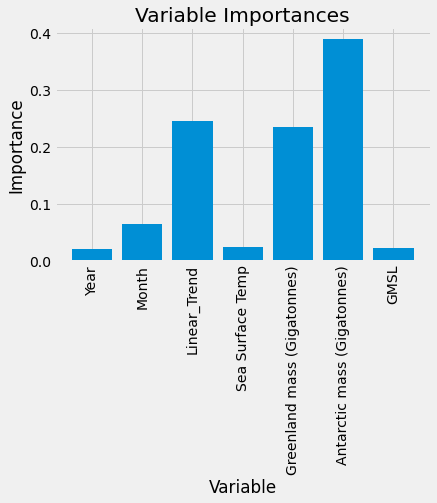

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

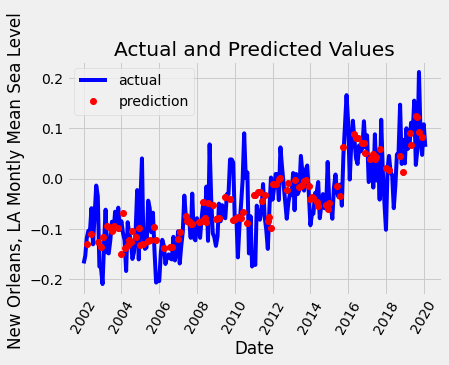

In [0]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
months = features[:, feature_list.index('Month')]
years = features[:, feature_list.index('Year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
dates = [datetime.datetime.strptime(date, '%Y-%m') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('Month')]
years = test_features[:, feature_list.index('Year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('New Orleans, LA Montly Mean Sea Level '); plt.title('Actual and Predicted Values');

### San Francisco, CA

In [0]:
sanFranData = data.drop(['Monthly_MSL','Linear_Trend','High_Conf.','Low_Conf.', 'Antarctic mass (Gigatonnes)'], axis=1)

In [0]:
print('The shape of our features is:', sanFranData.shape)
print(sanFranData.columns.values)

The shape of our features is: (218, 9)
['Year' 'Month' 'Sea Surface Temp' 'Greenland mass (Gigatonnes)' 'GMSL'
 'Monthly_MSL_SF' 'Linear_Trend_SF' 'High_Conf._SF' 'Low_Conf_SF']


In [0]:
# Descriptive statistics for each column to identify anomalies
sanFranData.describe()

,Year,Month,Sea Surface Temp,Greenland mass (Gigatonnes),GMSL,Monthly_MSL_SF,Linear_Trend_SF,High_Conf._SF,Low_Conf_SF
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,2010.587156,6.454128,1.009511,-2299.690688,19.456468,0.024472,0.026463,0.037885,0.015037
std,5.255168,3.477407,0.075146,1453.426490,19.384210,0.060804,0.010322,0.011102,0.009530
min,2002.000000,1.000000,0.850000,-4778.560000,-8.505000,-0.140000,0.009000,0.019000,-0.001000
25%,2006.000000,3.000000,0.996667,-3646.485000,4.002000,-0.014000,0.018000,0.028000,0.007000
50%,2011.000000,6.000000,0.996667,-2331.250000,16.170000,0.024000,0.026500,0.038000,0.015000
75%,2015.000000,9.000000,1.050000,-918.647500,35.697000,0.061000,0.035000,0.047000,0.023000
max,2020.000000,12.000000,1.180000,70.860000,58.375000,0.207000,0.044000,0.057000,0.031000


In [0]:
# We don't need to one hot encode since all numerical data
sanFranData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         218 non-null    int64  
 1   Month                        218 non-null    int64  
 2   Sea Surface Temp             218 non-null    float64
 3   Greenland mass (Gigatonnes)  218 non-null    float64
 4   GMSL                         218 non-null    float64
 5   Monthly_MSL_SF               218 non-null    float64
 6   Linear_Trend_SF              218 non-null    float64
 7   High_Conf._SF                218 non-null    float64
 8   Low_Conf_SF                  218 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 17.0 KB


In [0]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(sanFranData)
# Display the first 5 rows of the last 12 columns
features.head()

,Year,Month,Sea Surface Temp,Greenland mass (Gigatonnes),GMSL,Monthly_MSL_SF,Linear_Trend_SF,High_Conf._SF,Low_Conf_SF
0,2002,1,1.04,0.00,-8.505,-0.059,0.009,0.019,-0.001
1,2002,2,1.04,70.86,-8.505,-0.084,0.009,0.019,-0.001
2,2002,3,1.04,70.86,-8.505,-0.053,0.009,0.019,-0.001
3,2002,4,1.04,-218.88,-8.505,-0.039,0.009,0.019,-0.001
4,2002,5,1.04,-218.88,-8.505,-0.062,0.009,0.020,-0.001


In [0]:
# Labels are the values we want to predict
labels = np.array(features['Monthly_MSL_SF'])

# Remove the labels from the features
# axis 1 refers to the columns

features= features.drop(['Monthly_MSL_SF','High_Conf._SF','Low_Conf_SF'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.5, random_state = 42)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (109, 6)
Training Labels Shape: (109,)
Testing Features Shape: (109, 6)
Testing Labels Shape: (109,)


In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.03 degrees.


In [0]:
# Calculate mean absolute percentage error (MAPE)
#np.seterr(all='raise')
np.seterr(divide='ignore', invalid='ignore')

mape = 100 * (errors / test_labels)
# Removing inf values
mape[ mape > 1e308] = 0

# Calculate and display accuracy
accuracy = abs((np.mean(mape)))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.85 %.


In [0]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Greenland mass (Gigatonnes) Importance: 0.42
Variable: Linear_Trend_SF      Importance: 0.22
Variable: Month                Importance: 0.18
Variable: Sea Surface Temp     Importance: 0.07
Variable: Year                 Importance: 0.05
Variable: GMSL                 Importance: 0.05


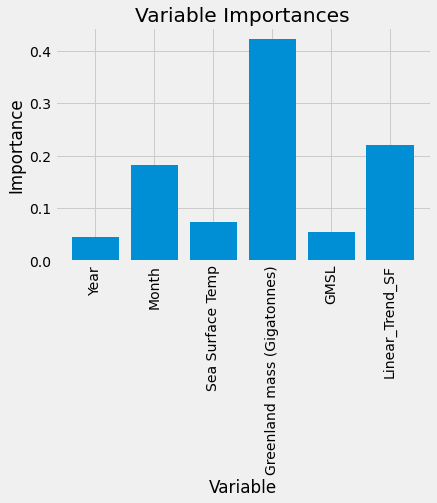

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

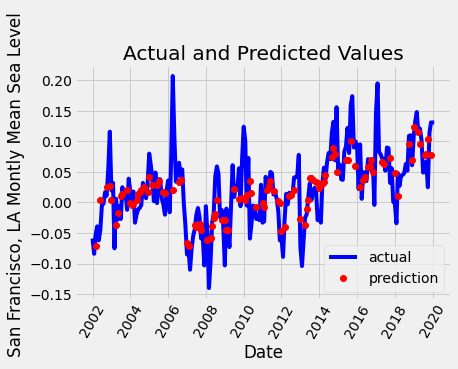

In [0]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
months = features[:, feature_list.index('Month')]
years = features[:, feature_list.index('Year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
dates = [datetime.datetime.strptime(date, '%Y-%m') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('Month')]
years = test_features[:, feature_list.index('Year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('San Francisco, LA Montly Mean Sea Level '); plt.title('Actual and Predicted Values');